In [1]:
# Install yfinance if not already
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')


In [2]:
# Set ticker and time frame
ticker = "TSLA"
start_date = "2023-01-01"
end_date = "2024-12-31"

# Download data
df = yf.download(ticker, start=start_date, end=end_date)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [6]:
# Basic checks
print(df.info())
print(df.isnull().sum())

# Optional: Fill or drop missing values
df = df.dropna()

# Reset index if needed
df.reset_index(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        501 non-null    datetime64[ns]
 1   (Close, TSLA)   501 non-null    float64       
 2   (High, TSLA)    501 non-null    float64       
 3   (Low, TSLA)     501 non-null    float64       
 4   (Open, TSLA)    501 non-null    float64       
 5   (Volume, TSLA)  501 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.6 KB
None
Price   Ticker
Date              0
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


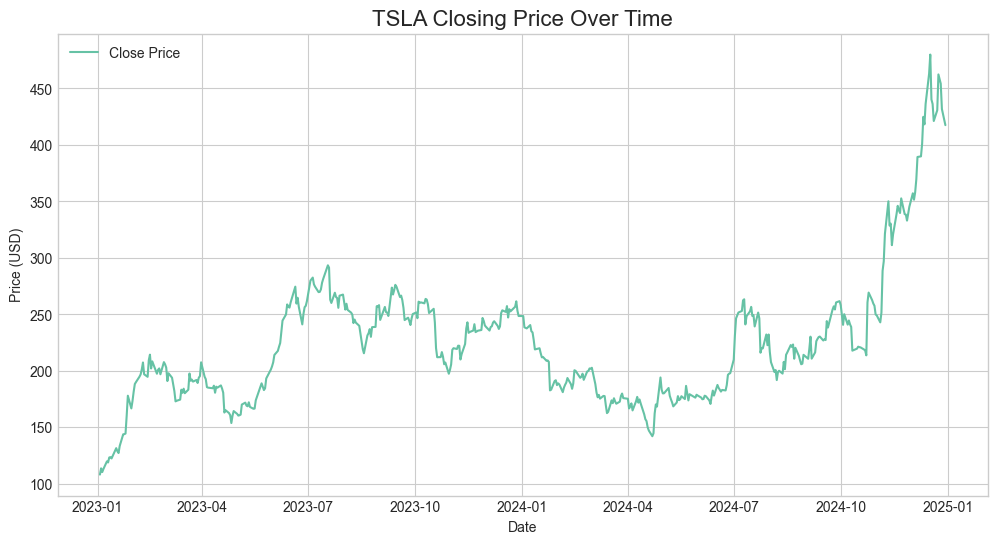

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title(f'{ticker} Closing Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


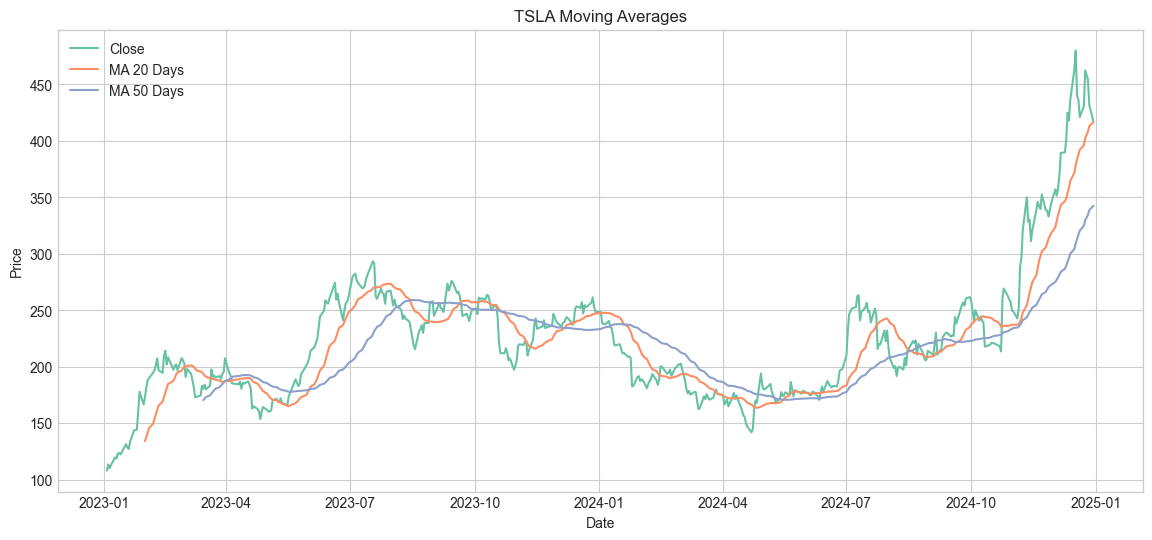

In [8]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA20'], label='MA 20 Days')
plt.plot(df['Date'], df['MA50'], label='MA 50 Days')
plt.title(f'{ticker} Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


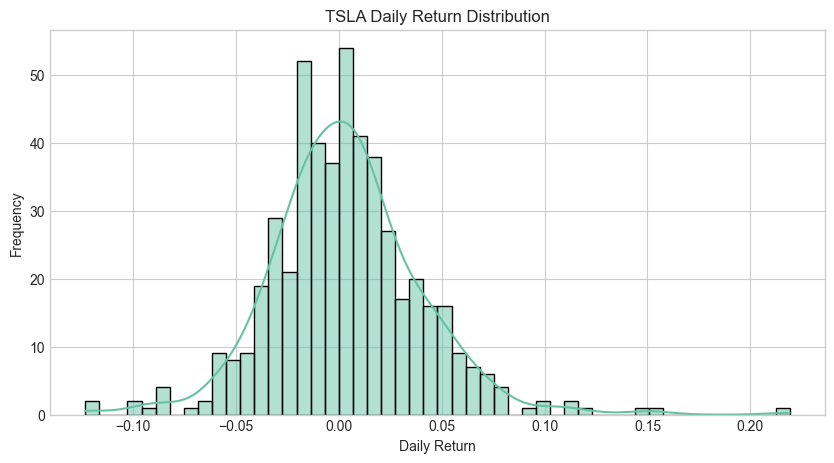

In [9]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title(f'{ticker} Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


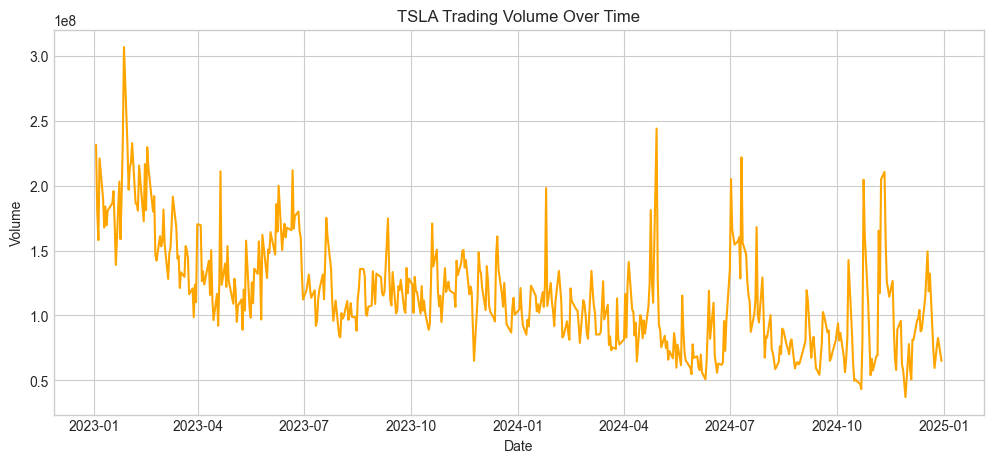

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title(f'{ticker} Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


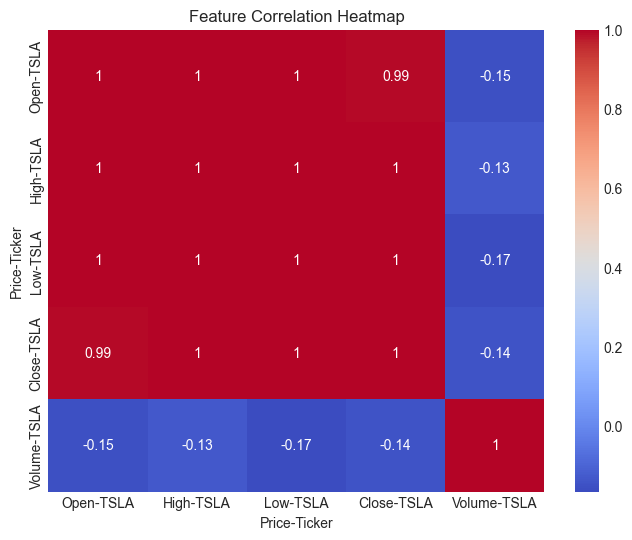

In [11]:
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


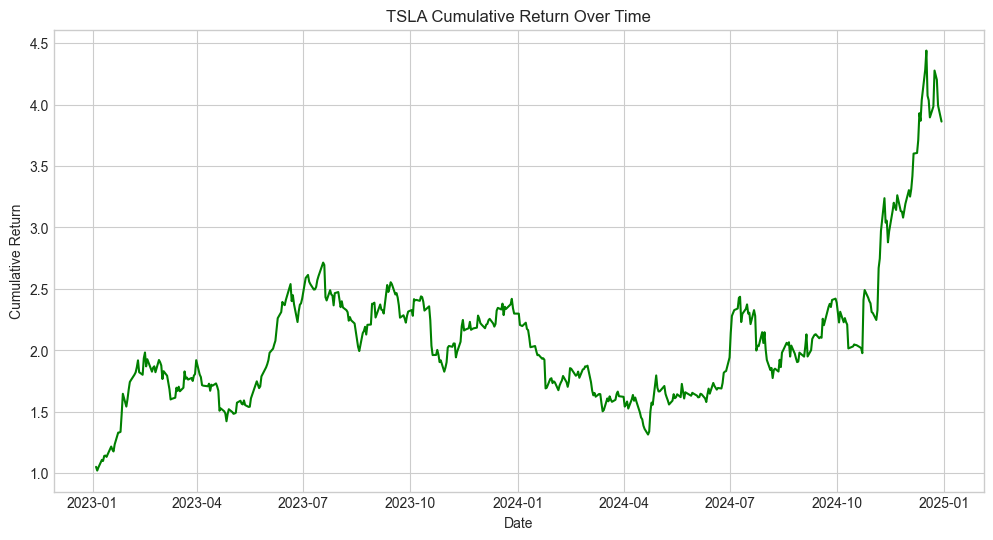

In [12]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Cumulative Return'], color='green')
plt.title(f'{ticker} Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()


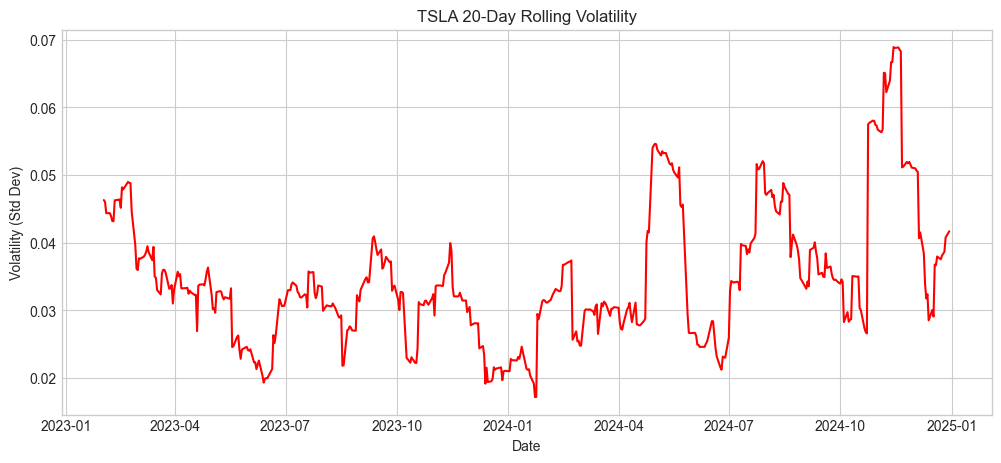

In [13]:
df['Rolling Volatility'] = df['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Rolling Volatility'], color='red')
plt.title(f'{ticker} 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.grid(True)
plt.show()


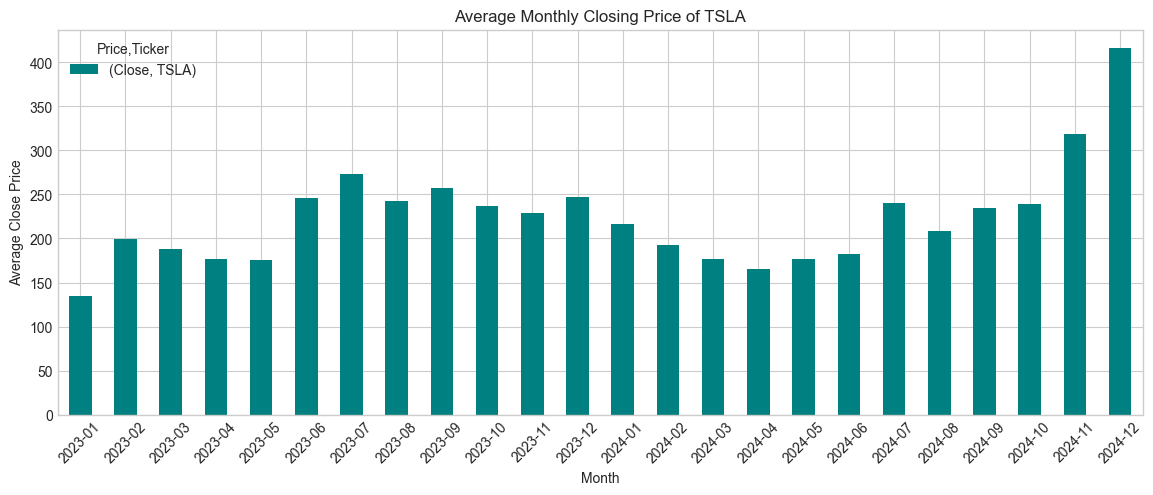

In [18]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Close'].mean()

monthly_avg.plot(kind='bar', figsize=(14,5), color='teal')
plt.title(f'Average Monthly Closing Price of {ticker}')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


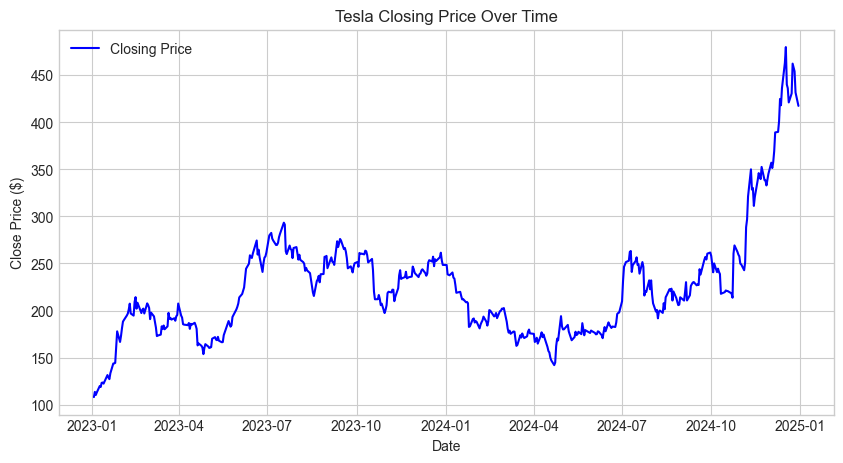

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()
plt.show()


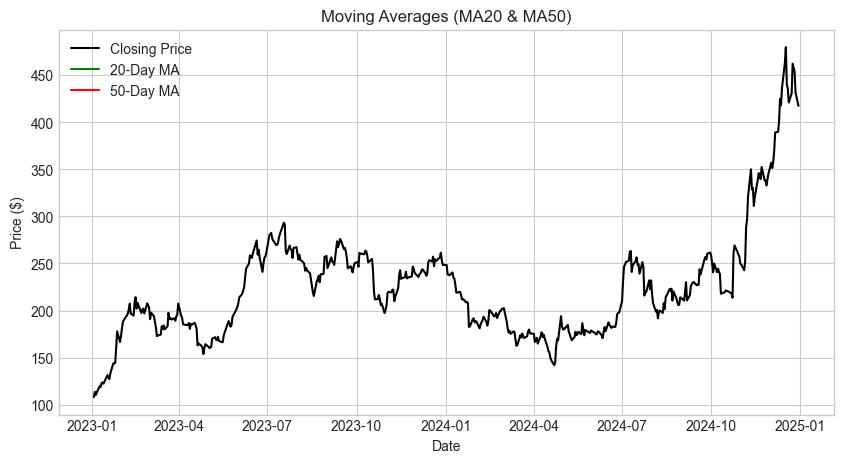

In [15]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='black')
plt.plot(df['Date'], df['MA20'], label='20-Day MA', color='green')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='red')
plt.title('Moving Averages (MA20 & MA50)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


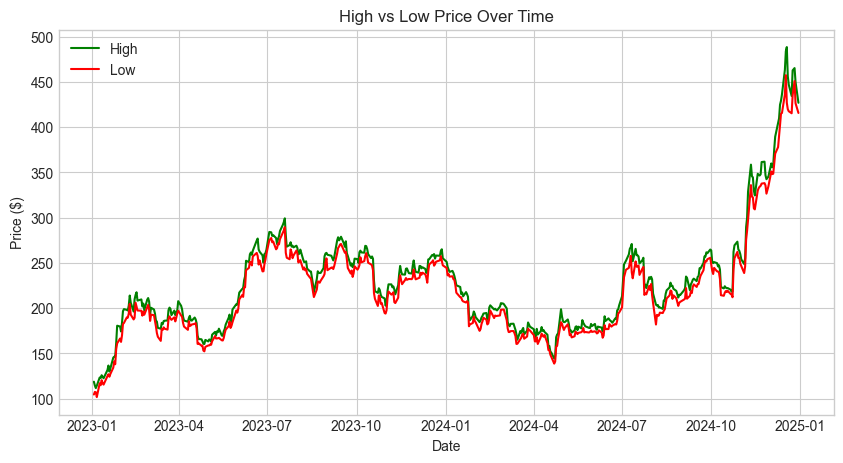

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.title('High vs Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()
